### 1. Import libraries

### 2. Import data

### 3. Questions & variables

### 4. Correlation
  <ul>
<li>4.1 Correlation heatmap Matplotlib</li>
 <li>4.2 Correlation heatmap Seaborn</li>
 <li>4.3 Scatterplot</li>
     <li>4.4 Pair Plot</li>
     <li>4.5 Categorical Plot</li>
      <li>4.6 Line Chart</li>
  </ul>

### 5. Questions & answers


### 6. Hypothesis

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Display charts without print them specifically.

%matplotlib inline

# 2. Import data

In [39]:
# Create a path

path = r'/Users/marie/Documents/CareerFoundry/11-2021 City Temperatures'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'city_temperatures_clean.csv'))

In [5]:
# Print shape

df.shape

(2867077, 8)

In [6]:
# Print column names

df.columns

Index(['Unnamed: 0', 'Region', 'Country', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')

In [7]:
# Dropping "Unnamed" column from df

df = df.drop(columns = ['Unnamed: 0'])

In [8]:
# Print head after dropping column

df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


In [9]:
# Print data types

df.dtypes

Region             object
Country            object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

# 3. Questions & variables

#### What is happening with temperature over time?
#### <br>When, in that case, the temperature begins to behave differently?
#### <br>Which Region/Countries are most affected by temperature differences?

***
#### Suitable variables: Region, Country, Year, AvgTemperature

# 4. Correlation

In [10]:
# Create a correlation matrix using pandas

df.corr()

,Month,Day,Year,AvgTemperature
Month,1.000000,0.010684,-0.000727,0.136464
Day,0.010684,1.000000,-0.000126,0.006888
Year,-0.000727,-0.000126,1.000000,0.030430
AvgTemperature,0.136464,0.006888,0.030430,1.000000


### 4.1 Correlation heatmap Matplotlib

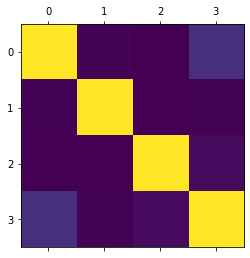

In [11]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

### 4.2 Correlation heatmap Seaborn

<AxesSubplot:>

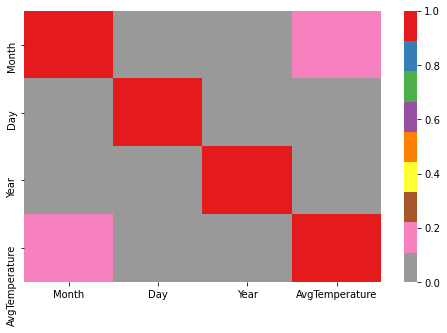

In [12]:
# Create a correlation heatmap using Seaborn
corr=df.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corr, cmap='Set1_r')

#### My dataset do not include a lot of correlations. There is a weak linear relationship (0,2) between AvgTemperature and Month.

### 4.3 Scatterplot 

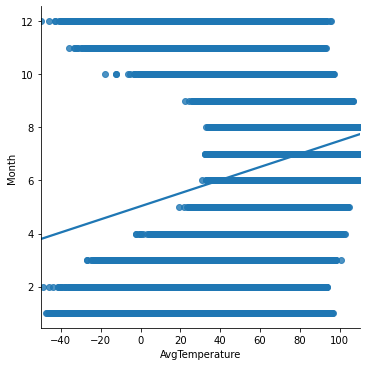

In [13]:
# Create a scatterplot with "AvgTemperature" and "Month" columns

sns = sns.lmplot(x = 'AvgTemperature', y = 'Month', data = df)

#### There are many values far away from the linear. What clearly shows here is the temperature difference during the year, and that the linear cross the AvgTemperature in month 6, 7, 8. 

### 4.4 Pair plot

In [21]:
# Create a subset including chosen number variables

sub = df[['Year', 'AvgTemperature']]

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


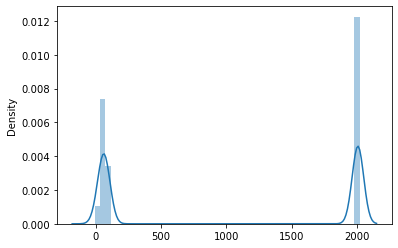

In [22]:
ax = sns.distplot(sub)

In [23]:
# Keep only the variables I want to use in the pair plot

sub_2 = df[['Region', 'AvgTemperature']]

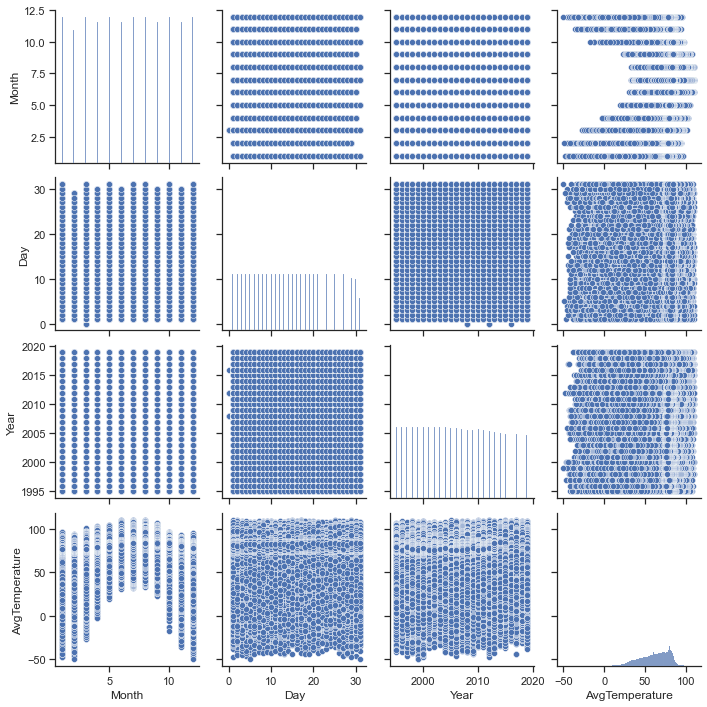

In [43]:
# Create a pair plot 

m = sns.pairplot(df)
plt.savefig('pair_plot.png') # save picture in Python folder

#### My dataset might contain too many values...!? Should I scale it down to just a few regions and the last 1-2 years?

### 4.5 Categorical Plot

/Users/marie/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AvgTemperature', ylabel='Density'>

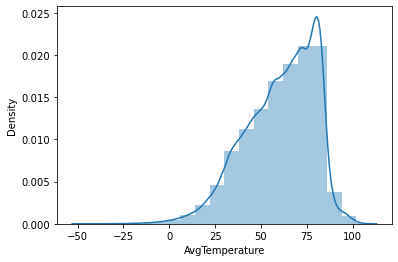

In [26]:
# Use a histogram to visualize the distribution of the variables.

sns.distplot(df['AvgTemperature'], bins = 20)

In [27]:
# Grouping AvgTemperature values using loc function

df.loc[(df['AvgTemperature'] > -50) & (df['AvgTemperature'] <= 35), 'Temp category'] = 'Low temperature'

In [28]:
df.loc[(df['AvgTemperature'] > 35) & (df['AvgTemperature'] <= 70), 'Temp category'] = 'Average temperature'

In [29]:
df.loc[df['AvgTemperature'] > 70, 'Temp category'] = 'High temperature'

In [30]:
# Print new column "Temp category"

df['Temp category'].value_counts(dropna = False)

Average temperature    1439334
High temperature       1038395
Low temperature         310183
NaN                      79165
Name: Temp category, dtype: int64

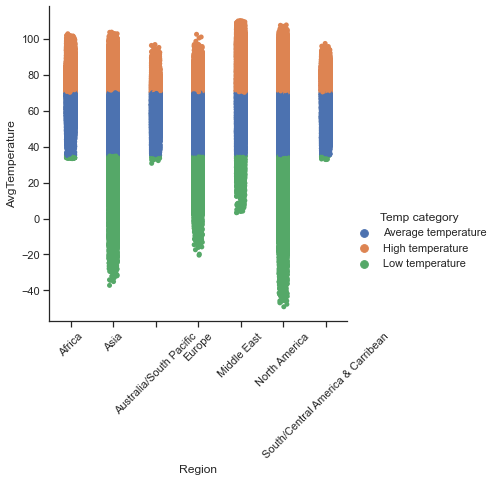

In [45]:
# Create a categorical plot in seaborn using the temp categories created above

sns.set(style="ticks")
g = sns.catplot(x="Region", y="AvgTemperature", hue="Temp category", data=df)
plt.xticks(rotation=45)
plt.savefig('categorial.png') # save picture in Python folder

#### In the Categorial Plot we see that Africa, Australia/South Pacific and South/central America & Carribean barely have any low temperatures (below 70F, 21C). North America has the coldes temperatures, followed by Asia.

### 4.6 Line Chart

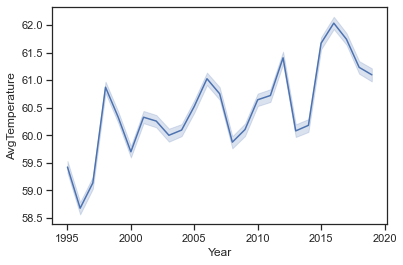

In [46]:
# Create a line chart, temperature over time

sns.lineplot(data = df, x = 'Year',y = 'AvgTemperature')
plt.savefig('line.png') # save picture in Python folder

#### I created a line chart to get a better overview of the temperature-behavior over time. 

# 5. Questions & Answers:
#### What is happening with temperature over time?
The average temperature goes up and down, but the line chart clearly shows that it's constantly increasing. 

#### When, in that case, the temperature begins to behave differently?
The first peak is in 1998 (60,9F), the second in 2006 (61,1F), the third in 2012 (61,4F). 
<br>The fourth and last peak in this dataset is in 2016 (62,1F). 
<br>With the second peak in 2006 the average temperature increased 0,3%.
<br>With the third peak in 2012 it increased 0,5%.
<br>And with the fourth peak in 2016 it increased by as much as 1,1%!

# 6. Hypothesis

#### Alternative Hypothesis
If not major changes are made for the climat, then the temperature will continue to increase much.